In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path
ROOT_DIR = os.path.abspath(os.path.join(Path().absolute(), os.pardir, os.pardir))
sys.path.insert(1, ROOT_DIR)
DIR_PATH = os.path.join(ROOT_DIR, 'research', 'fir_fr')

In [3]:
from glob import glob
import numpy as np
import scipy
import matplotlib.pyplot as plt
import soundfile as sf
from frequency_response import FrequencyResponse

In [4]:
def read_wav(file_path, expand=False):
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f'File in path "{os.path.abspath(file_path)}" does not exist.')
    data, fs = sf.read(file_path)
    if len(data.shape) > 1:
        # Soundfile has tracks on columns, we want them on rows
        data = np.transpose(data)
    elif expand:
        data = np.expand_dims(data, axis=0)
    return fs, data

In [5]:
def magnitude_response(x, fs):
    _x = x
    nfft = len(_x)
    df = fs / nfft
    f = np.arange(0, fs - df, df)
    X = scipy.fftpack.fft(_x)
    X_mag = 20 * np.log10(np.abs(X))
    return f[0:int(np.ceil(nfft/2))], X_mag[0:int(np.ceil(nfft/2))]

In [13]:
def plot_fir_fr(fp, ax=None):
    _, name = os.path.split(fp)
    name = name.replace('.wav', '')
    fs, data = read_wav(fp)
    f, raw = magnitude_response(data[0, :], fs)
    if ax is None:
        fig, ax = plt.subplots()
        fig.set_size_inches(18, 9)
    ax.plot(f, raw)
    ax.semilogx()
    ax.grid(True)

### FIR Filters Produced Locally

In [ ]:
for fp in glob(os.path.join(ROOT_DIR, 'my_results', 'HD 600 FIR', '*.wav')):
    plot_fir_fr(fp)
    plt.show()

### FIR Filters Provided by the User

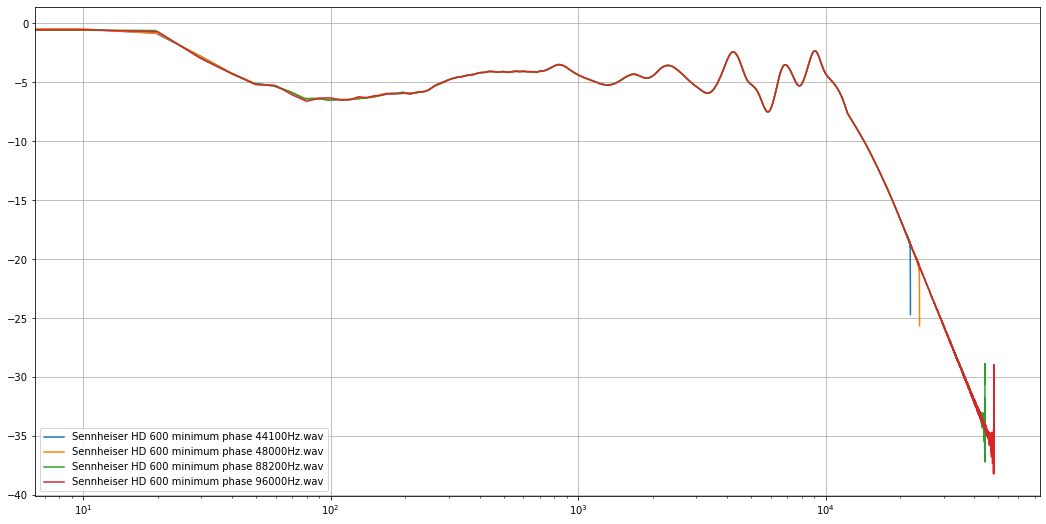

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 9)
legend = []
for fp in glob(os.path.join(DIR_PATH, '*.wav')):
    plot_fir_fr(fp, ax=ax)
    legend.append(os.path.split(fp)[1])
ax.legend(legend)
fig.savefig('user_filters.png')
plt.show()